# Independent Lab: Inferential Statistics
## Analysis of System Adoption Data
### Lewis Hughes 
### Intro to Python
### 4/28/25

In this lab, I will perform multiple regression using employee questionnaire data regarding system adoption. 

I will:
- Build a regression model predicting `intent1_01`
- Assess assumptions: linearity, collinearity, homoscedasticity, independence, and normality
- Analyze F-test and T-tests for model fit
- Provide business interpretation for two significant predictors
- Display the final regression equation

Importing Libraries

In [ ]:
!pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

Loading the dataset

In [2]:
data = pd.read_csv('data/ect_data.txt', delimiter="\t")  

# Preview the data

print(data.head())

   attitude1_01  attitude1_02  attitude1_03  attitude1_04  intent1_01  \
0             6             6             6             6           6   
1             7             7             7             7           7   
2             6             6             6             6           7   
3             7             7             7             7           6   
4             7             7             6             6           7   

   intent1_02  intent1_03  intent1_04  peruse01  peruse02  peruse03  peruse04  \
0           6           6           6         6         4         5         5   
1           7           7           7         7         7         7         7   
2           7           7           7         6         5         5         5   
3           6           7           6         5         5         5         5   
4           7           7           6         6         6         7         7   

   satis01  satis02  satis03  satis04  
0        5        5        5      

## Select Target and Predictors
I will use `intent1_01` as the target variable.  
I will choose 5 numerical predictors **excluding** `intent1_02`, `intent1_03`, and `intent1_04`.

In [3]:
# Define target and features

target = 'intent1_01'

# Choose 5 predictors
predictors = ['attitude1_01', 'attitude1_02', 'satis01', 'satis02', 'peruse01']

X = data[predictors]
y = data[target]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.01
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           9.40e-31
Time:                        14:54:32   Log-Likelihood:                -211.54
No. Observations:                 201   AIC:                             435.1
Df Residuals:                     195   BIC:                             454.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9961      0.353      2.826   

## Check Linearity
Now, I will examine scatterplots between each predictor and the target variable.

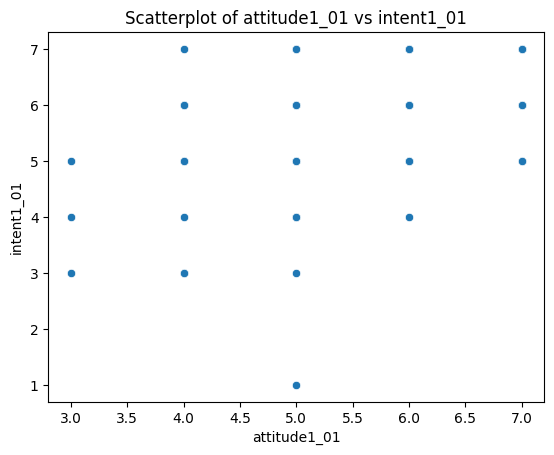

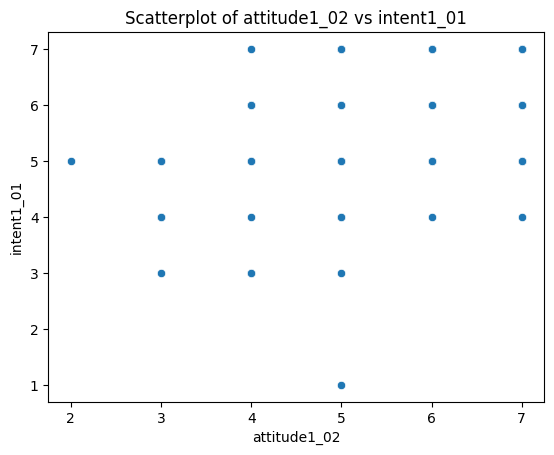

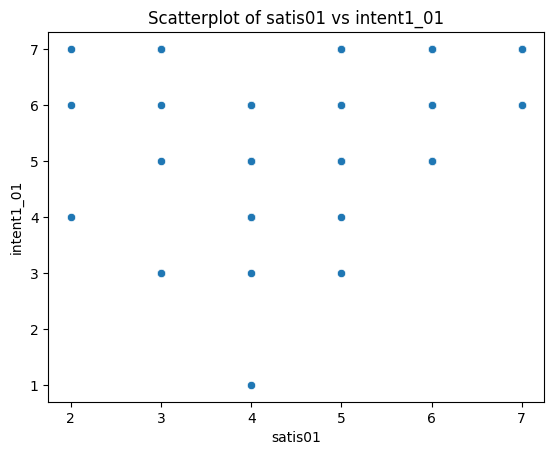

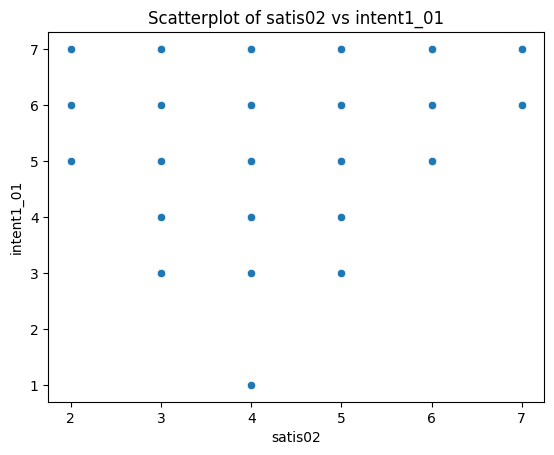

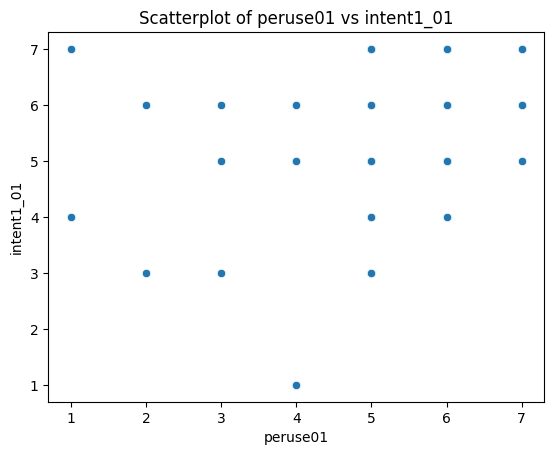

In [4]:
# Scatterplots
for var in predictors:
    plt.figure()
    sns.scatterplot(x=data[var], y=data[target])
    plt.title(f'Scatterplot of {var} vs {target}')
    plt.xlabel(var)
    plt.ylabel(target)
    plt.show()

## Check Collinearity
Now, I will compute the Variance Inflation Factor (VIF) for each predictor.

In [5]:
# Check VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        feature        VIF
0         const  50.439415
1  attitude1_01   3.208845
2  attitude1_02   2.657443
3       satis01   4.484163
4       satis02   4.341000
5      peruse01   1.548590


## Check Homoscedasticity
Next, I will plot residuals versus fitted values.

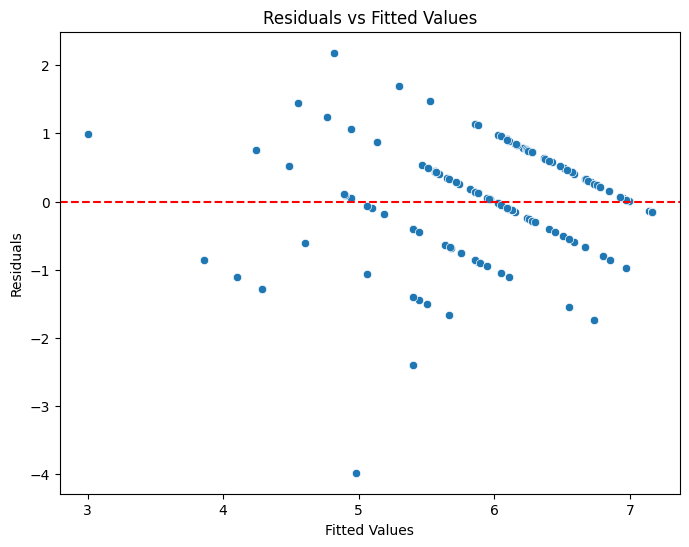

In [6]:
# Checking homoscedasticity
fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8,6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Check Independence
Now, I will use the Durbin-Watson statistic to assess independence of residuals.

In [7]:
# Independence - Durbin-Watson
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat:.3f}')

Durbin-Watson statistic: 1.929


## Check Normality
Next, I will use a QQ plot and Shapiro-Wilk test.

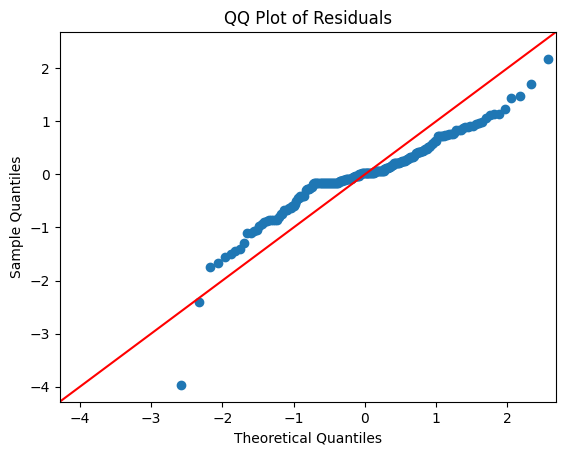

Shapiro-Wilk Test: W=0.921, p-value=0.000


In [8]:
# Checking normality

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: W={shapiro_stat:.3f}, p-value={shapiro_p:.3f}')

## Analyzing the Model

1. Attitude Toward the System (`attitude1_01`)

The coefficient for `attitude1_01` is 0.3098, meaning that for every one-unit increase in positive attitude toward the system, intention to use the system (`intent1_01`) increases by 0.3098 units, holding all other factors constant.

**Business Implication:**  
Improving employees' overall attitude toward the system significantly enhances their intention to adopt it. Positive perception campaigns, user training, and addressing system concerns could meaningfully increase user acceptance.

2. Perceived Usefulness (`peruse01`)

The coefficient for `peruse01` is 0.2337, indicating that a one-unit increase in perceived usefulness results in a 0.2337 unit increase in intention to use the system.

**Business Implication:**  
Employees who find the system more useful are more likely to adopt it. Therefore, emphasizing features that enhance productivity and demonstrating tangible benefits will be critical in promoting system adoption.

## Interpretation of Regression Model

The regression model for predicting `intent1_01` was statistically significant overall (F(5, 195) = 45.01, p < 0.001), with an R-squared value of 0.536. This suggests that approximately 53.6% of the variance in intention to use the system can be explained by the selected predictors.

Two predictors were found to be statistically significant based on t-tests:
- `attitude1_01` (p = 0.001)
- `peruse01` (p < 0.001)

The other variables (`attitude1_02`, `satis01`, and `satis02`) were not statistically significant (p > 0.05).

The final regression equation is:
intent1_01 = 0.9961 + 0.3098*(attitude1_01) + 0.1481*(attitude1_02) + 0.1676*(satis01) + 0.0215*(satis02) + 0.2337*(peruse01)

## Refrences

https://www.statisticshowto.com/probability-and-statistics/

I used this website to brush up on some statistical methods

https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

I used this stack over flow chat to help with my QQ plots but I ended up doing them a little differently 

I also used my notes from applied statistics which I took last semester with Brian Hammer. 